<a href="https://colab.research.google.com/github/SeffySnow/CV_Sepinood/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# prompt: import pandas matplotlip, numpy

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive

url = "https://raw.githubusercontent.com/SeffySnow/GA-community-detection/main/com-dblp.ungraph.txt"



# Creating the dataframe

In [117]:
# !pip install --upgrade pip
# !pip install networkx matplotlib
# !pip install snappy
!pip install networkx plotly


In [118]:
data = pd.read_csv(url,delimiter='\t')
data.rename(columns={data.columns[0]: "FromNodeID", data.columns[1]: "ToNodeID"}, inplace=True)
network_data= pd.DataFrame(data)
shuffled_network_data = network_data.sample(frac=1)
network_data.head()


,FromNodeID,ToNodeID
0,0,2
1,0,4519
2,0,23073
3,0,33043
4,0,33971


In [120]:
network_data.tail()

,FromNodeID,ToNodeID
1049860,425662,425821
1049861,425669,425696
1049862,425670,425677
1049863,425788,425833
1049864,425875,425876


# Creating a subgraph from the main network

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
r = np.arange(0, 30000, 100).tolist()
network_small = pd.DataFrame(columns=["FromNodeID","ToNodeID"])

for i in r:
  network_small = pd.concat([network_small ,network_data.loc[network_data["FromNodeID"]==i]], axis=0).reset_index(drop=True)

G = nx.DiGraph()

# add nodes:
G.add_nodes_from(network_small["FromNodeID"])

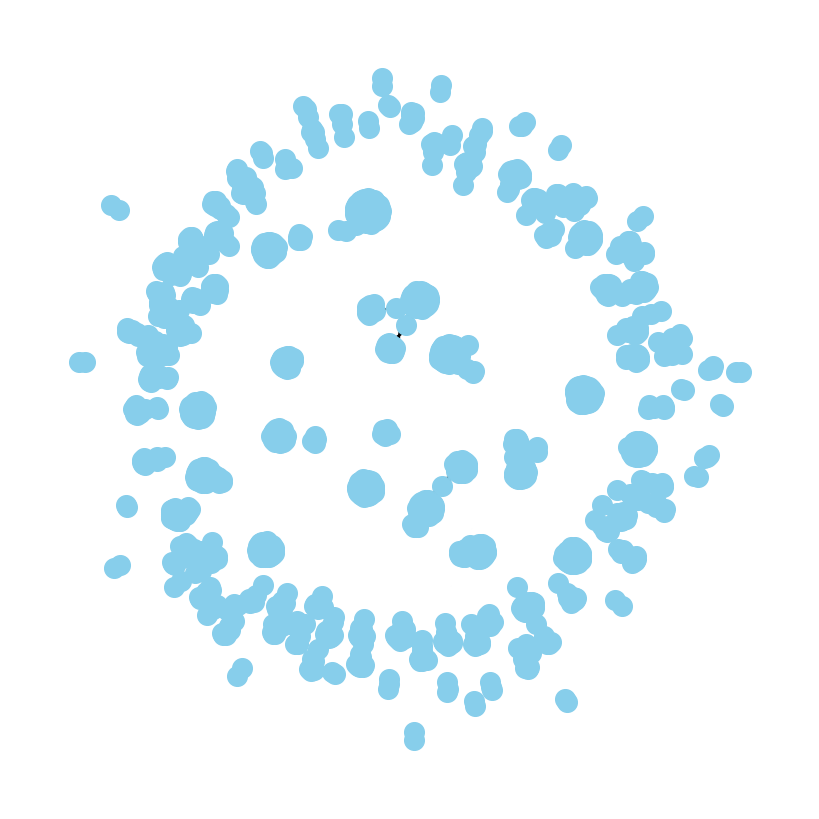

In [146]:

G =  nx.from_pandas_edgelist(network_small, "FromNodeID","ToNodeID")
G = G.to_directed()
plt.figure(figsize=(8,8))
nx.draw(G,with_labels=False, node_color ="skyblue", node_size =200, edge_color="k")


# create adjacency matrix from network_small

In [147]:


import numpy as np

# Convert the NetworkX graph to an adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Print the adjacency matrix
print(adjacency_matrix)
adj = pd.DataFrame(adjacency_matrix)

adj

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,0,1,2,3,4,5,6,7,8,9,...,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


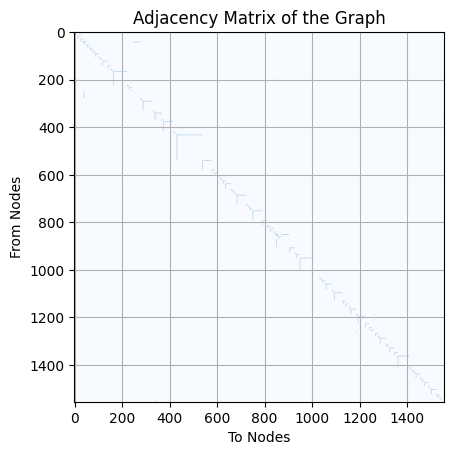

In [148]:
# prompt: graph the adjancy matrix with nodes and edges

import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the adjacency matrix as an image
ax.imshow(adj, cmap="Blues")

# Add labels to the axes
ax.set_xlabel("To Nodes")
ax.set_ylabel("From Nodes")

# Add a title to the plot
ax.set_title("Adjacency Matrix of the Graph")

# Add grid lines to the plot
ax.grid(True)

# Show the plot
plt.show()
